In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid")



True


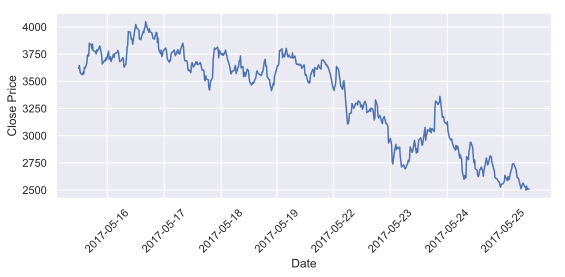

In [0]:
df = pd.read_csv("week2.csv")
df.Date = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(df.index.dtype == "datetime64[ns]")

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=df, x=df.index, y='Close Price', ax=ax)
plt.xticks(plt.xticks()[0], df.index.date, rotation=45)
plt.tight_layout()
plt.show()


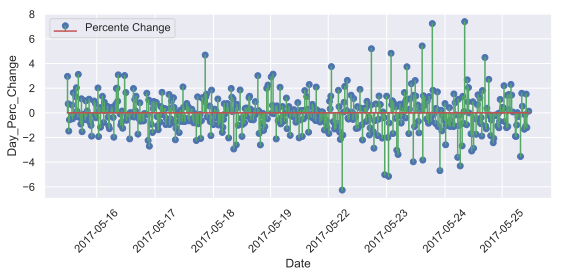

'\nThe graph sugest that these variables are highly correlated as high volume make more Percentage change and vice versa.\n'

In [0]:

fig, ax = plt.subplots(figsize=(8, 4))
ax.stem(df.index, df.Day_Perc_Change, 'g', markerfmt='bo', label='Percente Change')
plt.xlabel('Date')
plt.ylabel('Day_Perc_Change')
plt.xticks(plt.xticks()[0], df.index.date, rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


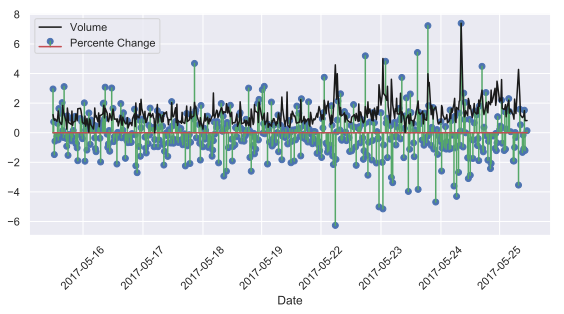

In [0]:

scaledvolume =  df["No. of Trades"] - df["No. of Trades"].min()
scaledvolume = scaledvolume/scaledvolume.max() * df.Day_Perc_Change.max()

fig, ax = plt.subplots(figsize=(8, 4))

ax.stem(df.index, df.Day_Perc_Change , 'g', markerfmt='bo', label='Percente Change')
ax.plot(df.index, scaledvolume, 'k', label='Volume')

ax.set_xlabel('Date')
plt.legend(loc=2)

plt.tight_layout()
plt.xticks(plt.xticks()[0], df.index.date, rotation=45)
plt.show()


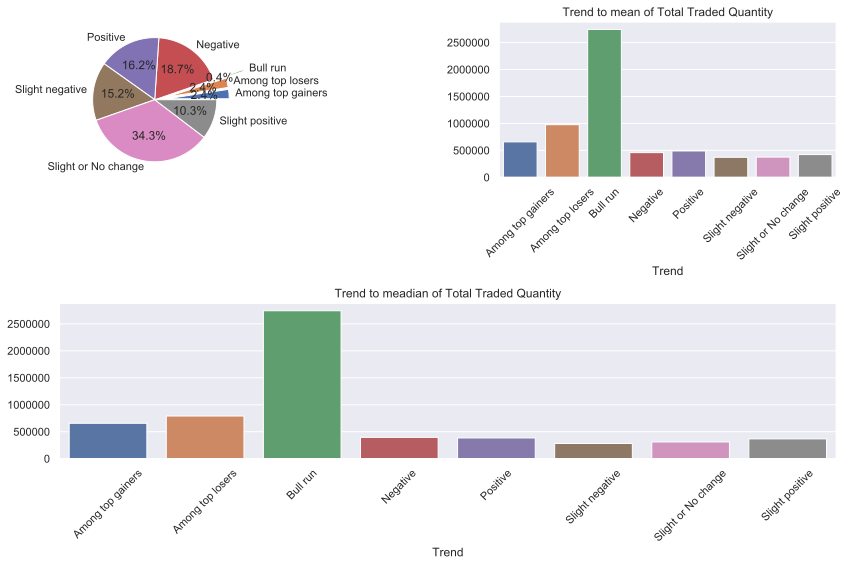

In [0]:
gridsize = (2, 6)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 3), colspan=3)
ax3 = plt.subplot2grid(gridsize, (1, 0), colspan=6)

df['ones'] = np.ones((df.shape[0]))
sums = df.ones.groupby(df.Trend).sum()
explod = [0.2, 0.2, 0.5, 0, 0, 0, 0 ,0]
ax1.pie(sums, labels=sums.index, autopct='%1.1f%%', explode=explod)
ax2.title.set_text('Trend')
df = df.drop(['ones'], axis=1)

bard1 = df[['Trend', 'Total Traded Quantity']].groupby(['Trend'], as_index=False).mean()
bar1 = sns.barplot("Trend", 'Total Traded Quantity', data=bard1, ci=None, ax=ax2)
for item in bar1.get_xticklabels():
    item.set_rotation(45)
ax2.set_ylabel('') 
ax2.title.set_text('Trend to mean of Total Traded Quantity')

bard2 = df[['Trend', 'Total Traded Quantity']].groupby(['Trend'], as_index=False).median()
bar2 = sns.barplot("Trend", 'Total Traded Quantity', data=bard2, ci=None, ax=ax3)
for item in bar2.get_xticklabels():
    item.set_rotation(45)
ax3.set_ylabel('') 
ax3.title.set_text('Trend to meadian of Total Traded Quantity')

plt.tight_layout()
plt.show()


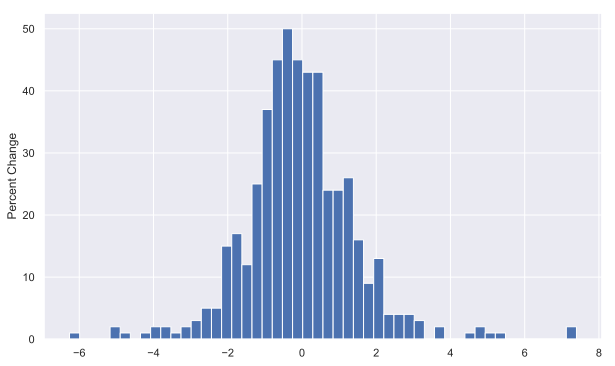

In [0]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.Day_Perc_Change, bins=50)
ax.set_ylabel('Percent Change')
plt.show()


C:\Users\ABDUL BASID\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ABDUL BASID\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


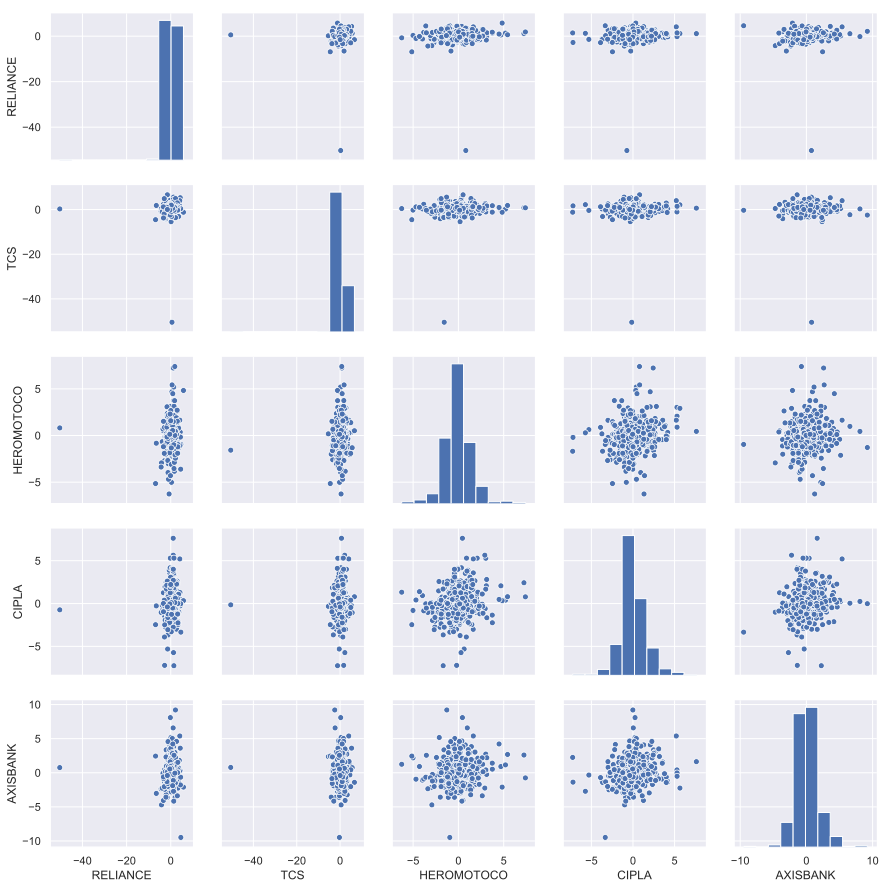

In [0]:

stocks = ['RELIANCE.csv', 'TCS.csv', "HEROMOTOCO.csv", 'CIPLA.csv', 'AXISBANK.csv']
dfs={}

for i in stocks:
    stock = i.split('.')[0]
    temp_df = pd.read_csv(i)
    temp_df = temp_df[temp_df["Series"] == "EQ"]
    temp_df['Day_Perc_Change'] = temp_df['Close Price'].pct_change()*100
    temp_df = temp_df['Day_Perc_Change']
    temp_df = temp_df.drop(temp_df.index[0])
    dfs[stock] = temp_df

dfs = pd.DataFrame(dfs)
sns.pairplot(dfs)
plt.show()


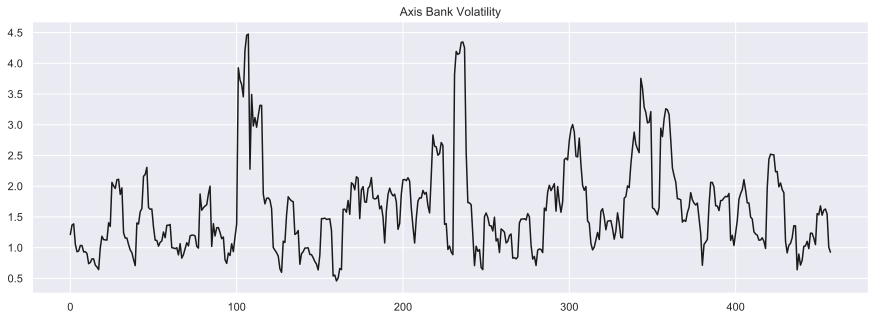

In [0]:

for i in dfs.columns:
    dfs[f'{i}_rollingStd'] = dfs[f'{i}'].rolling(7).std()

dfs = dfs.dropna()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(dfs.AXISBANK_rollingStd)), dfs.AXISBANK_rollingStd, 'k')
plt.title('Axis Bank Volatility')
plt.show()


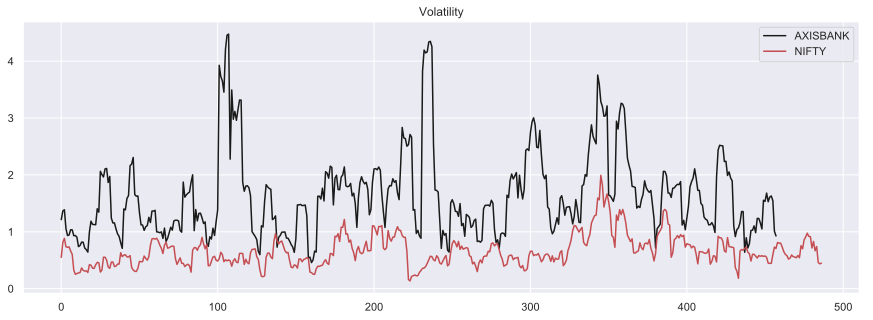

In [0]:

ndf = pd.read_csv('Nifty50.csv')
ndf['Day_Perc_Change'] = ndf['Close'].pct_change()*100
ndf['rolling_std'] = ndf['Day_Perc_Change'].rolling(7).std()
ndf = ndf.dropna()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(dfs.AXISBANK_rollingStd)), dfs.AXISBANK_rollingStd, 'k', label='AXISBANK')
ax.plot(np.arange(len(ndf.rolling_std)), ndf.rolling_std, 'r', label='NIFTY')
plt.legend()
plt.title('Volatility')
plt.show()


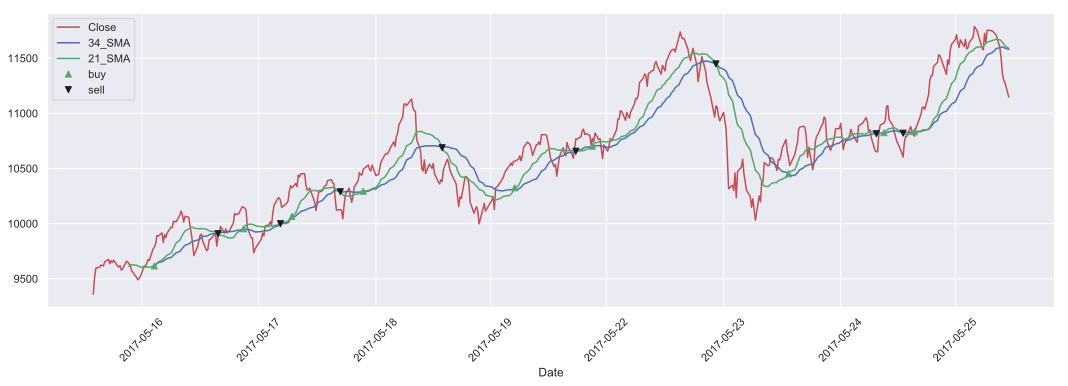

In [0]:

ndf.Date = pd.to_datetime(ndf['Date'])
fig, ax = plt.subplots(figsize=(15, 5))
ndf['roll21'] = ndf['Close'].rolling(21).mean()
ndf['roll34'] = ndf['Close'].rolling(34).mean()
ndf.dropna()

def whenCrosses(values):
    l=[]
    were = values[0]
    flag = True
    for i, ele in enumerate(values):
        if were==ele:
            l.append(0)
        else:
            l.append(1)
            were = ele
    return l
ndf['buy'] = ndf['roll34']<ndf['roll21']
ndf['sell'] = ndf['roll34']>ndf['roll21']

ndf['buy_change'] = np.array(whenCrosses(ndf.buy.values.reshape(1, len(ndf.buy)).flatten()))
ndf['sell_change'] = np.array(whenCrosses(ndf.sell.values.reshape(1, len(ndf.sell)).flatten()))

ndf['buy'] = ndf['buy_change'].where(ndf['buy']==True)
ndf['buy'] = ndf['roll21'].where(ndf['buy']==1)

ndf['sell'] = ndf['sell_change'].where(ndf['sell']==True)
ndf['sell'] = ndf['roll21'].where(ndf['sell']==1)

ax.plot(ndf.Date, ndf.Close, 'r')
ax.plot(ndf.Date, ndf.roll34, 'b', label='34_SMA')
ax.plot(ndf.Date, ndf.roll21, 'g', label='21_SMA')
ax.plot(ndf.Date, ndf.buy, "g^")
ax.plot(ndf.Date, ndf.sell, "kv")

ax.set_xlabel('Date')
plt.legend(loc=2)
plt.tight_layout()
plt.xticks(plt.xticks()[0], df.index.date, rotation=45)
plt.show()


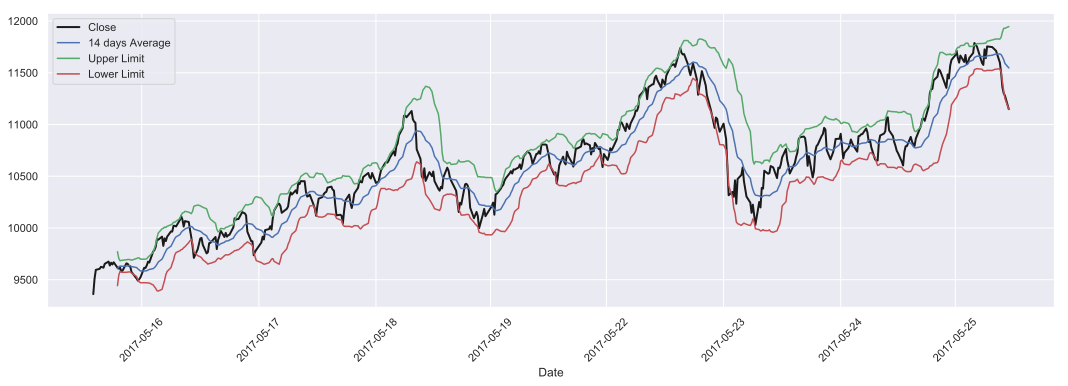

In [0]:

ndf['bollinger'] = ndf['Close'].rolling(14).mean()
std = ndf['Close'].rolling(14).std()
ndf['upper'] = ndf['bollinger'] + 2 * std 
ndf['lower'] = ndf['bollinger'] - 2 * std

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ndf.Date, ndf['Close'], 'k', lw=2)
ax.plot(ndf.Date, ndf['bollinger'], 'b', label='14 days Average')
ax.plot(ndf.Date, ndf['upper'], 'g', label='Upper Limit')
ax.plot(ndf.Date, ndf['lower'], 'r', label='Lower Limit')
# ax.fill_between(ndf.Date, ndf['upper'], ndf['lower'], color='grey')

ax.set_xlabel('Date')
plt.legend(loc=2)
plt.tight_layout()
plt.xticks(plt.xticks()[0], df.index.date, rotation=45)
plt.show()
